## 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

## 데이터 준비

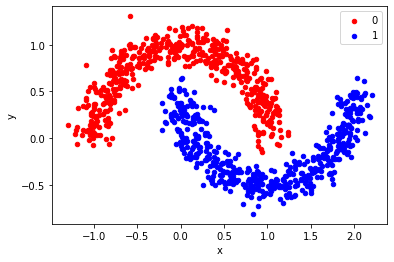

In [22]:
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=1000, noise=0.1, random_state=1)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(train_x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

# 로스, 지표 그리기

## 학습

In [28]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=32, validation_split=0.1)

## 로스 그리기

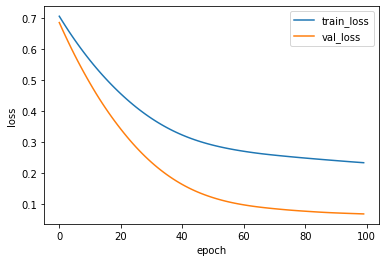

In [24]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## 지표 그리기

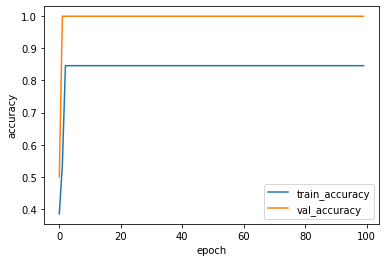

In [25]:
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 학습 중에 로스, 지표 그리기

## callback 정의

In [30]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.losses = []
    self.val_losses = []
    self.accuracy = []
    self.val_accuracy = []


  # epoch 1번이 종료될 때 마다 호출 된다.
  def on_epoch_end(self, epoch, logs={}):

    # 받은 loss와 val_loss를 추가
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.accuracy.append(logs.get('accuracy'))
    self.val_accuracy.append(logs.get('val_accuracy'))

    # loss 그래프 그리기
    clear_output(wait=True)

    plt.plot(self.losses, label="train_loss")
    plt.plot(self.val_losses, label="val_loss")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    plt.plot(self.accuracy, label="train_accuracy")
    plt.plot(self.val_accuracy, label="val_accuracy")
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()    


## 학습

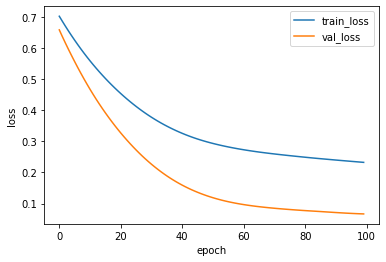

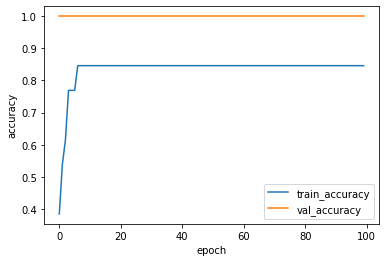

In [31]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=32, validation_split=0.1, 
          callbacks=[plot_losses])
